# Início do projeto

Objetivo: Classificar se um paciente possui doença de câncer Maligno ou Benigno com base em seus exames 

In [ ]:
import pandas as pd

resultados_exames = pd.read_csv('/content/drive/MyDrive/projetos/projetos-classificacao/exames.csv')
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [ ]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns = ['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames,
                                                        diagnostico)

Iremos usar como modelo o RandomForestClassifier. Esse modelo trabalha de forma análaga a Árvore de Decisão, porém no RandomForest, ele nada mais é que uma junção de várias árvores de decisão para executar a classificação final

------------------------------------------------------

O modelo de RandomForest não aceita células vazias, portanto iremos dar uma olhada no dataframe, o quanto possuimos de informações dessa característica.

In [ ]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [ ]:
# Verificando o quanto a coluna exame_33 possui de valores nulos
419/569

0.7363796133567663

Vimos que nesse caso, uma grande parte dos dados estão vazios nessa coluna, praticamente 75%, portanto iremos remover essa Feature da análise

In [ ]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns = ['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns = 'exame_33')

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1,
                                                        diagnostico,
                                                        test_size = 0.3)



from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100) 
classificador.fit(treino_x, treino_y)
print("Resultado da classificação: %.2f %%" %(classificador.score(teste_x, teste_y)*100))

Resultado da classificação: 92.40 %


Antes de diminuirmos a dimensionalidade do nosso dataframe, precisamos antes saber por meio de um Baseline, se já temos um valor adequado no desenpenho, para executar essa ação de diminuição da dimensionalidade.

------------------------------------------------------

Para isso utilizaremos um classificador bobo, burro, o DummyClassifier, que servirá para nós de Baseline. Nele será utilziado a estratégia de verificar qual valor aparece mais em nosso dataframe, e ele chutará a maior parte dele como resposta para previsão.

In [ ]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy = 'most_frequent')
classificador_bobo.fit(treino_x, treino_y)
print("Resultado da classificação boba: %.2f %%" %(classificador_bobo.score(teste_x, teste_y)*100))

Resultado da classificação boba: 66.67 %


Após rodar um classificador bobo, percebemos que seu desempenho foi de 66.67 %, ou seja, bem abaixo do nosso classificador de RandomForest, portanto, como estamos tratando com dados de alta dimensionalidade, iremos realizar o tratamento dos dados, e sempre perseguiremos, esse desempenho de 92.4 % que já sabemos que foi obtido anteriormente, visando alcança-lo e até mesmo melhorá-lo. Utilizaremos ele como um bom BaseLine para prosseguirmos nas próximas etapas

------------------------------------------------------

Agora que ja definimos nosso Baseline para o projeto, precisamos estudar o comportamentos dos dados.
Lembrando que nosso Target (['diagnostico']), tem valor B para benigno e M para maligno

In [ ]:
# Construindo um dataframe onde transformaremos todos as colunas exames em linhas 
# pela coluna ['exames'] e todos os valores pela coluna ['valores'], para isso utilizado a função melt
# Realizando esses passos para plotar o gráfico em formato de violino, e verificar o comportamento dos exames
# na nossa variável Target 

dados_plot = pd.concat([diagnostico, valores_exames_v1], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico',
                     var_name = 'exames',
                     value_name = 'valores')
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

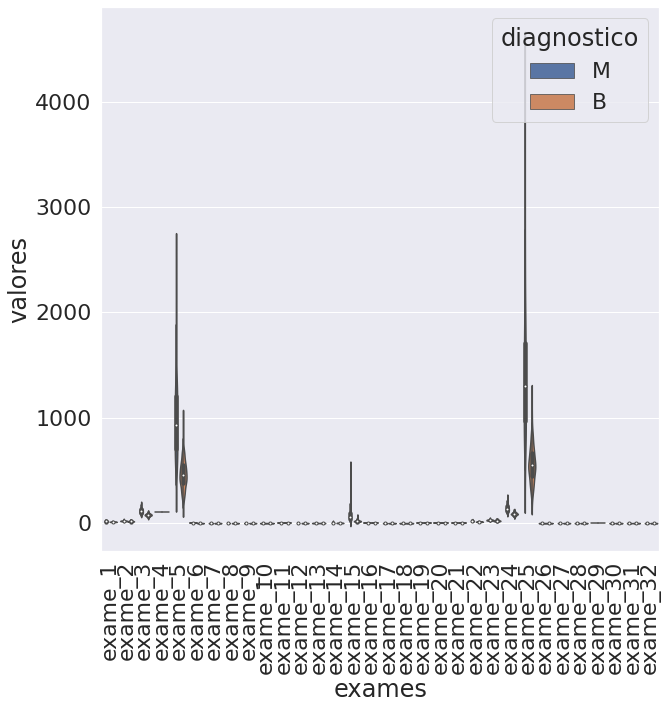

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot)

plt.xticks(rotation = 90)
# utilizando em x em y as colunas criadas no dataframe anterior, por esse motivo o passo anterior realizado

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

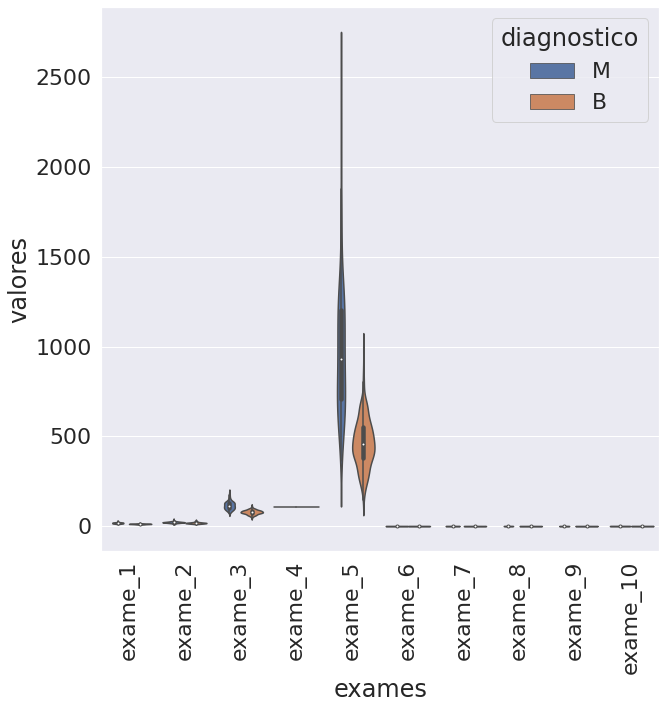

In [ ]:
# Melhorando a visualização

dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico',
                     var_name = 'exames',
                     value_name = 'valores')
dados_plot.head()

plt.figure(figsize = (10,10))
sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot)

plt.xticks(rotation = 90)

In [ ]:
# Melhorando a visualização - Ajustando a escala

from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
# Transformando em um dataframe, pois o retorno desse ajuste de escala é um Array, porém a função de plot do gráfico interpreta apenas um dataframe

valores_exames_v2 = pd.DataFrame(data = valores_exames_v2,
                                 columns = valores_exames_v1.keys())
valores_exames_v2.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

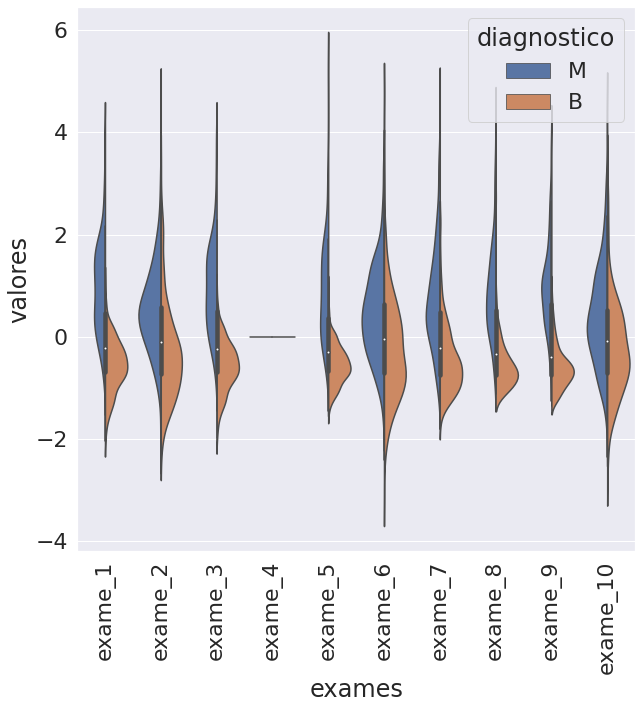

In [ ]:
dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico',
                     var_name = 'exames',
                     value_name = 'valores')
dados_plot.head()

plt.figure(figsize = (10,10))
sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split = True)

plt.xticks(rotation = 90)

Esse gráfico é interessante analisar, pois com ele conseguimos verificar o comportamento das cristas de cada exame. Quanto mais uma crista é deslocada verticalmente da outra, isso quer dizer que esse exame consegueme mais facilmente identificar a diferença entre o benigno e o maligno. Quanto mais rente eles são, mais imperseptivel o resultado desse exame trás, quanto essa característica.
Por exemplo, o exame 2, é muito mais provável de identificar essa evidência do que o exame 6

In [ ]:
# o exame_4 apresenta uma reta no gráfico, pois apresenta apenas valores constantes, que não agrega nada em nossos dados

valores_exames_v1.exame_4

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

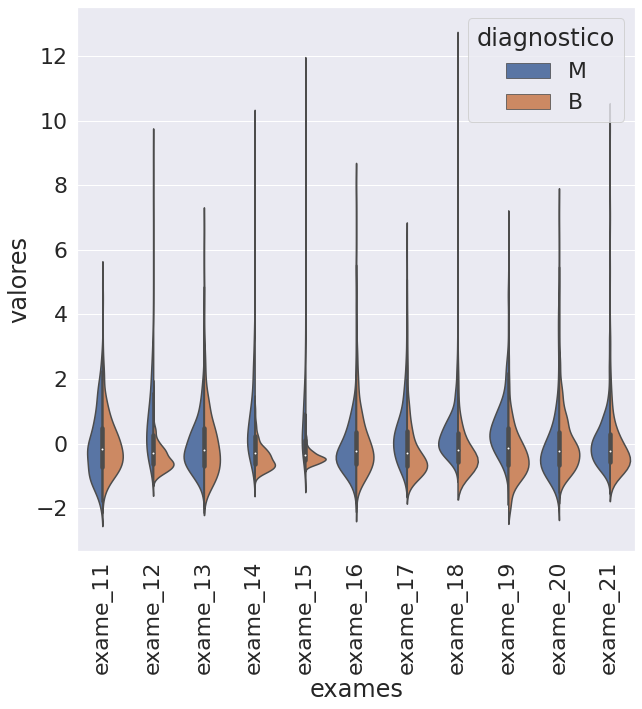

In [ ]:
# Crianda função para auxiliar na plotagem dos gráficos dos exames faltantes

def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,inicio:fim]], axis = 1)
  dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico', 
                       var_name = 'exames',
                       value_name = 'valores')
  dados_plot.head()

  plt.figure(figsize = (10,10))
  sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split = True)

  plt.xticks(rotation = 90)

grafico_violino(valores_exames_v2, 10, 21)

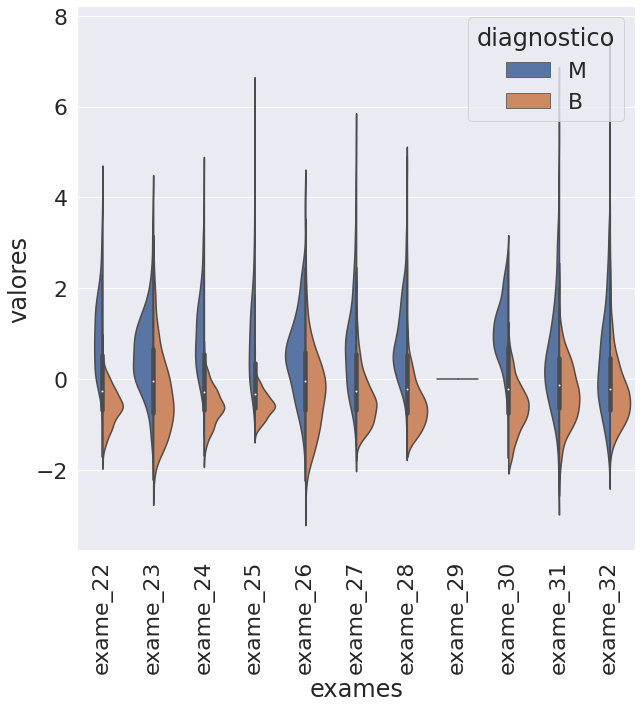

In [ ]:
grafico_violino(valores_exames_v2, 21, 32)

In [ ]:
# Removendo as colunas de valores constantes, que não serão úteis para a análise

valores_exames_v3 = valores_exames_v2.drop(columns = ['exame_29', 'exame_4'])

def classificar(valores):
  SEED = 1234
  random.seed(SEED)
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores,
                                                        diagnostico,
                                                        test_size = 0.3)
  
  classificador = RandomForestClassifier(n_estimators = 100) 
  classificador.fit(treino_x, treino_y)
  print("Resultado da classificação: %.2f %%" %(classificador.score(teste_x, teste_y)*100))

classificar(valores_exames_v3)

Resultado da classificação: 92.98 %


Portanto, verificamos que melhoramos a Acurácia, ou seja, não pioramos o nosso modelo e ainda removemos variáveis desnecessárias

In [ ]:
valores_exames_v3.head()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Verificaremos a correlação entre as variáveis. Lembrando que mais perto de 1 (positivo), mais essas variáveis se influenciam diretamente. Quanto mais perto de -1 (negativo), elas se influenciam inversamente.

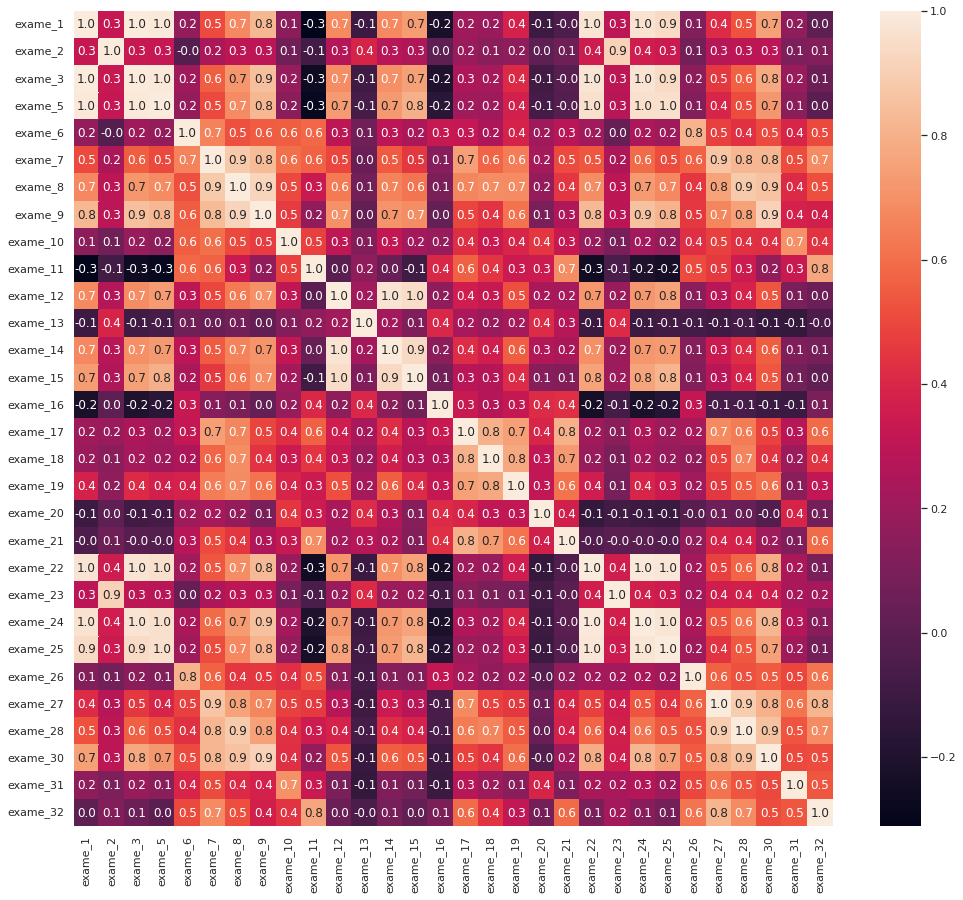

In [ ]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize = (17,15))
sns.set(font_scale = 1)
sns.heatmap(matriz_correlacao, annot = True, fmt = '.1f')

In [ ]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [ ]:
# Essas as variáveis que são mais correlacionadas entre sí. Exame 1 e 3, 22 e 24
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [ ]:
valores_exames_v4 = valores_exames_v3.drop(columns =variaveis_correlacionadas.keys()) 
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
classificar(valores_exames_v4)

Resultado da classificação: 91.81 %


Vimos acima que essas variáveis se relacionam fortemente. Para esse nosso caso, é interessante excluir uma de cada de cada par, pois como elas influenciam praticamente no mesmo comportamento, é desnecessario manter as duas no dataframe

------------------------------------------------------

Lembrando que a matriz de correlação pode ser lida e utilizada de outras formas, como por exemplo se quisessemos saber qual variável tem uma ligação forte com nossa variável Target, nesse caso, seria interessante manter as variáveis que as influenciam fortemente

In [ ]:
valores_exames_v5 = valores_exames_v3.drop(columns = ['exame_3', 'exame_24'])
classificar(valores_exames_v5)

Resultado da classificação: 92.98 %


Conseguimos remover mais duas Features, melhorando processamento e tamanho do dataframe, e ainda continuamos com a mesma acertividade do modelo

Mesmo que variáveis possuam alta correlação entre sí, não necessariamente uma implica na causualidade da outra, isto é, não necessariamente uma está sendo influenciada diretamente na outra, elas podem apenas ter uma alta correlação mas uma não necessariamente implica em causar a outra

------------------------------------------------------

Agora por meio de uma função do Sklearn iremos selecionar quais são as melhores Features para o problema

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Escolhemos a função para o cálculo (que ira calcular as melhores features), uma comumente usada é a chi2
selecionar_kmelhores = SelectKBest(chi2, k = 5)

A função ki2 não aceita valores negativos, então precisamos resgatar nosso dataframe antes de ser normalizado que é quando não tinha valores negativos para ser possível rodar a função, formando uma nova versão com os dados positivos, porém com as colunas removidas a posteriore do tratamento, da mesma forma

In [ ]:
valores_exames_v6 = valores_exames_v1.drop(columns = (['exame_4', 'exame_29', 'exame_3', 'exame_24']))

In [ ]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size = 0.3)

selecionar_kmelhores.fit(treino_x,treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [ ]:
teste_kbest.shape

(171, 5)

In [ ]:
classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_kbest, treino_y)
print("Resultado da classificação: %.2f %%" %(classificador.score(teste_kbest, teste_y)*100))

Resultado da classificação: 92.40 %


Analisando resultados do modelo

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

[Text(38.5, 0.5, 'Real'), Text(0.5, 20.5, 'Predição')]

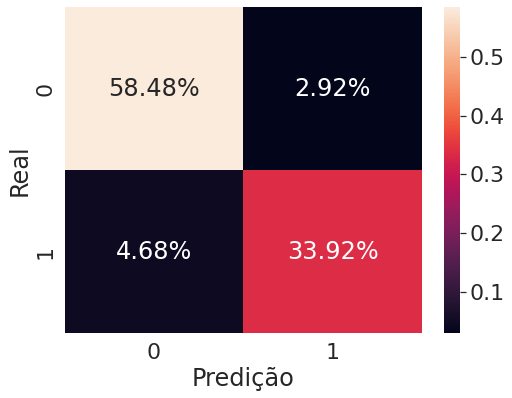

In [ ]:
import numpy as np

plt.figure(figsize = (8,6))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao/np.sum(matriz_confusao), annot = True, fmt = '.2%').set(xlabel = 'Predição', ylabel = 'Real')

Agora será feita uma nova forma de avaliação para saber as Features mais importantes, porém agora descartando as de menor acurácia

Resultado da classificação: 90.06 %


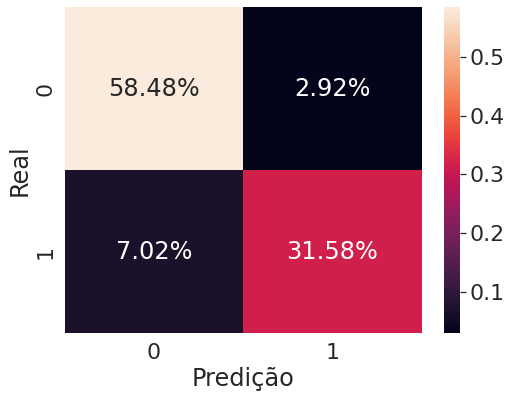

In [ ]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size = 0.3)


classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_x, treino_y)
selecionar_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionar_rfe.fit(treino_x, treino_y)
treino_rfe = selecionar_rfe.transform(treino_x)
teste_rfe = selecionar_rfe.transform(teste_x)
classificador.fit(treino_rfe,treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (8,6))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao/np.sum(matriz_confusao), annot = True, fmt = '.2%').set(xlabel = 'Predição', ylabel = 'Real')

print("Resultado da classificação: %.2f %%" %(classificador.score(teste_rfe, teste_y)*100))

Utilizando a técnica do RFE Cross Validation para saber qual confunto de Features gerará o melhor resultado para nós:

Resultado da classificação: 92.98 %


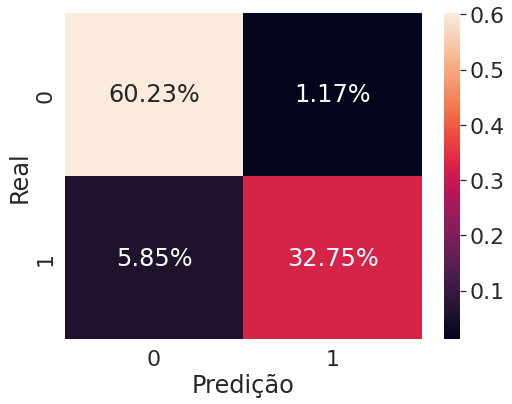

In [ ]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size = 0.3)


classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_x, treino_y)
selecionar_rfecv= RFECV(estimator = classificador, cv = 5, step = 1, scoring = 'accuracy')
selecionar_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionar_rfecv.transform(treino_x)
teste_rfecv = selecionar_rfecv.transform(teste_x)
classificador.fit(treino_rfecv,treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize = (8,6))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao/np.sum(matriz_confusao), annot = True, fmt = '.2%').set(xlabel = 'Predição', ylabel = 'Real')

print("Resultado da classificação: %.2f %%" %(classificador.score(teste_rfecv, teste_y)*100))

In [ ]:
# Verificando quais Features foram escolhidas
treino_x.columns[selecionar_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [ ]:
# Esse array mostra a acurácia que o modelo teve usando apenas uma feature (primeiro elemento da lista), e a acurácia usando todos(úlitmo da lista)
len(selecionador_rfecv.grid_scores_)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


28

<function matplotlib.pyplot.show(*args, **kw)>

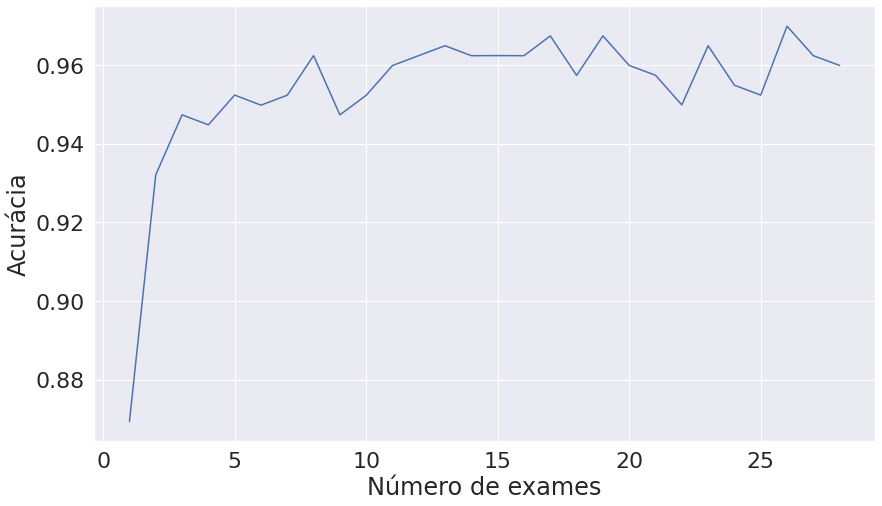

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score']) + 1), selecionador_rfecv.cv_results_['mean_test_score'])
plt.show

Acima a média de comportamento da acurácia para cada número de exames selecionados

Resultado da classificação 87.13%


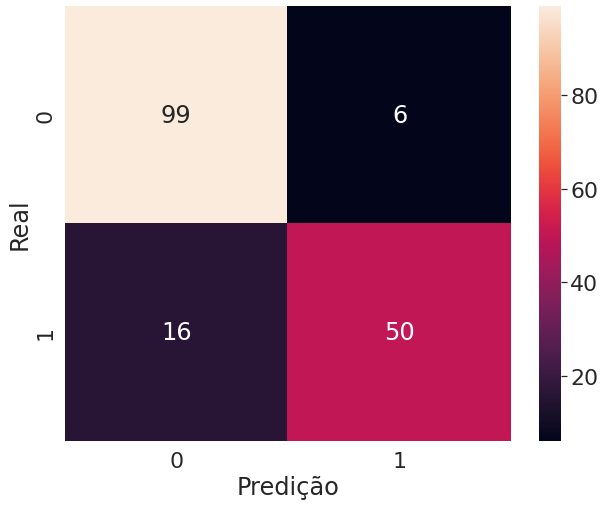

In [ ]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))

In [ ]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)
valores_exames_v7.shape

(569, 2)

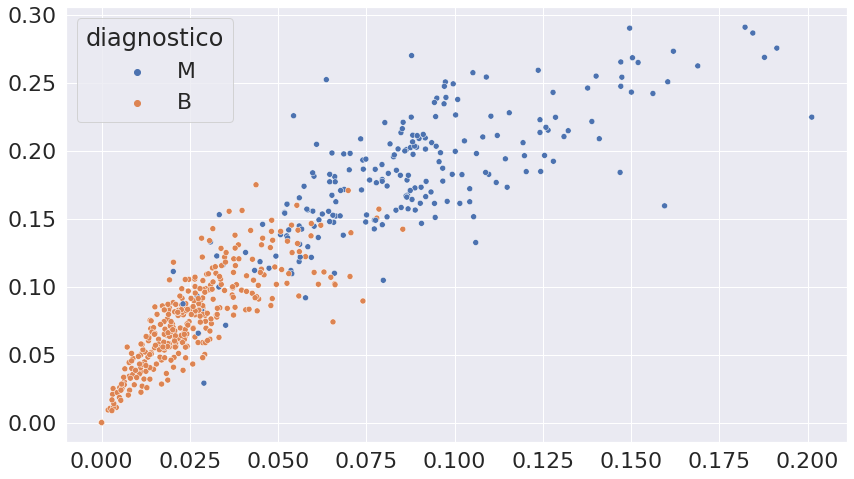

In [ ]:
import seaborn as sns 

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue = diagnostico)

Este gráfico foi plotado para visualizar o comportamento do tipo do cancer, porém como é uma visualização em 2D, temos que utilizar apenas duas Features para viabilizar a plotagem, por conta disso perdemos muita informação. Por esse motivo utilizaremos o método PCA, que selecionará as duas Features que possuem o maior número de informações para plotagem do gráfico 

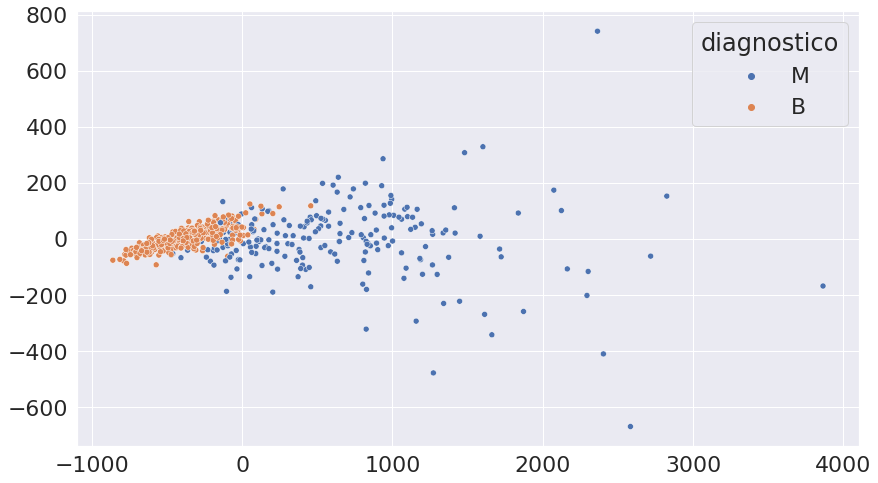

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v6)
plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

Apicaremos agora no dataframe v5, que estava normalizado, para melhor visualização

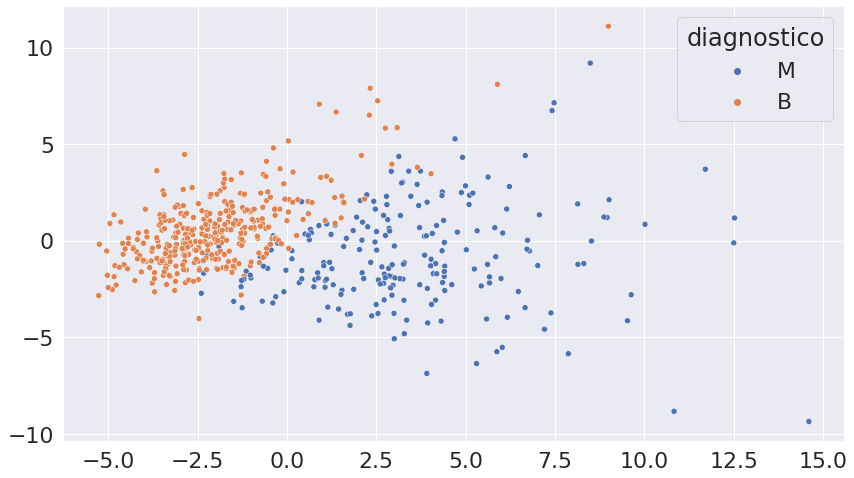

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)
plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


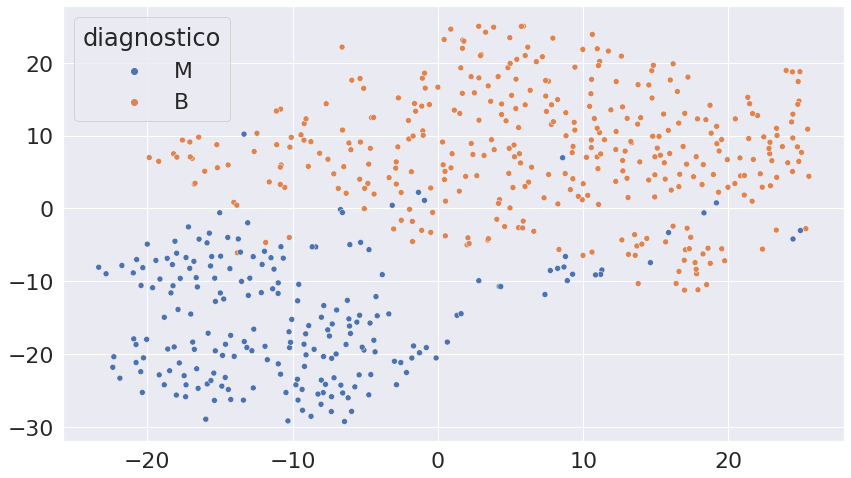

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico)

Diferentemente dos métodos de redução de dimensionalidade utilizados em aulas anteriores, como RFE e SelectKBest, o PCA e o TSNE Não "escolhe" as melhores características (features) de acordo com o número de dimensões que escolhemos, é aí que está a grande melhoria em relação aos métodos anteriores.

O que o método PCA Faz, por exemplo, é uma combinação das características do dataset e aplica uma transformação nos dados por meio de modelos matemáticos, e então nós usamos esses dados transformados para fazer a classificação. O TSNE segue a mesma ideia.

Quando executa-se no código os seguintes comandos:

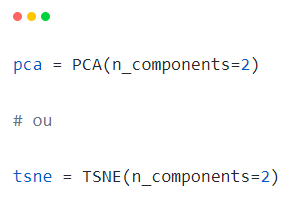

Estamos falando que queremos que nossa transformação, após o fit_transform tenha dimensão 2, ou seja, 2 colunas (sendo a primeira que melhor classifica nossos dados, a segunda coluna que classifica bem mas não tão bem quanto a primeira, e assim sucessivamente, caso quisesse mais dimensões.)

Então não temos, após a tranformação, uma coluna de exame_1, exame_2, exame_3... e sim combinações das informações presentes em cada uma dessas colunas de exames.

para checar o número de linhas e colunas usa-se o método shape, conforme exemplo a seguir:
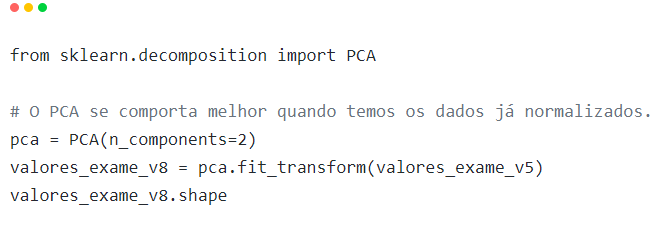